In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AR, ARResults

In [2]:
df = pd.read_csv('Data/uspopulation.csv', index_col='DATE', parse_dates=True)

In [3]:
df.index.freq = 'MS'

In [4]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


<AxesSubplot:xlabel='DATE'>

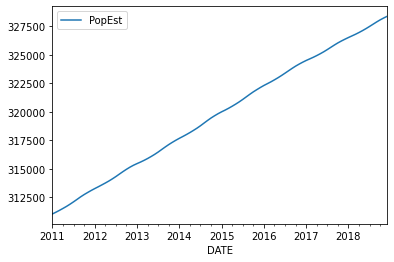

In [5]:
df.plot()

In [6]:
len(df)

96

In [8]:
train = df.iloc[:84]
test = df.iloc[84:]

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
model = AR(train['PopEst'])

In [11]:
AR1_fit = model.fit(maxlag=1)

In [12]:
AR1_fit.aic

6.410771237031846

In [13]:
AR1_fit.k_ar

1

In [20]:
AR1_fit.params[1]
AR1_fit.params['const']

284.91379679046804

In [22]:
start = len(train)
end = len(train) + len(test) - 1

print(start); print(end)

84
95


In [23]:
AR1_fit.predict(start=start, end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [24]:
prediction1 = AR1_fit.predict(start=start, end=end)

In [25]:
print(prediction1)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64


In [27]:
prediction1 = prediction1.rename('AR(1) Preds')
print(prediction1)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Preds, dtype: float64


<AxesSubplot:xlabel='DATE'>

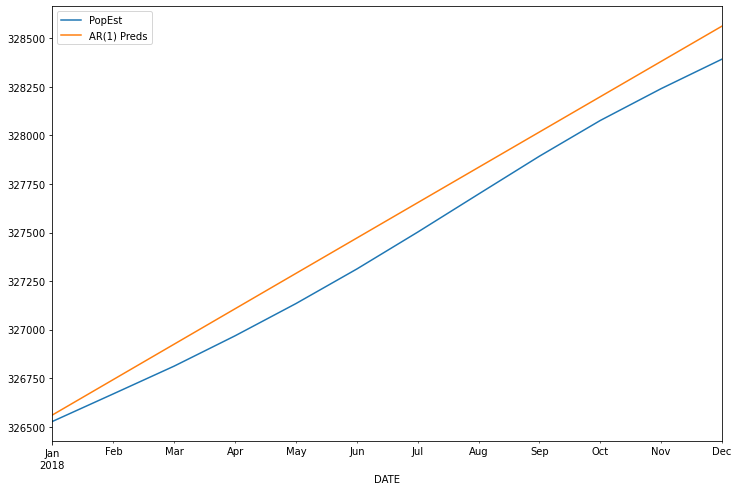

In [31]:
test.plot(figsize=(12,8), legend=True)
prediction1.plot(legend=True)

In [35]:
AR2fit = model.fit(maxlag=2)

In [38]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [40]:
AR2fit.params['const']; AR2fit.params['L1.PopEst']

1.853489714099453

In [41]:
predictions2 = AR2fit.predict(start, end)

In [42]:
predictions2 = predictions2.rename('AR(2) Predictions')

<AxesSubplot:xlabel='DATE'>

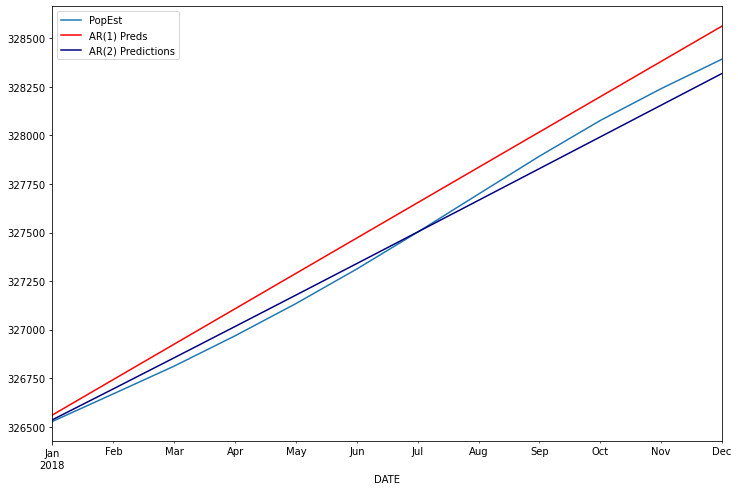

In [48]:
test.plot(figsize=(12,8), legend=True)
prediction1.plot(legend=True, color="red")
predictions2.plot(legend=True, color="navy")

In [55]:
#Use statsmodels to let the p order be selected dynamically
model = AR(train['PopEst'])
ARfit = model.fit(ic='t-stat')

In [56]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [60]:
predictions8 = ARfit.predict(start,end)
predictions8 = predictions8.rename('AR(8) Predictions')

#Evaluate against test set
from sklearn.metrics import mean_squared_error

In [61]:
labels=['AR1', 'AR2', 'AR3']
preds = [prediction1,predictions2, predictions8]

In [63]:
for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} MSE was:{error}')

AR1 MSE was:17449.714240543028
AR2 MSE was:2713.2586479327815
AR3 MSE was:186.97560716307473


<AxesSubplot:xlabel='DATE'>

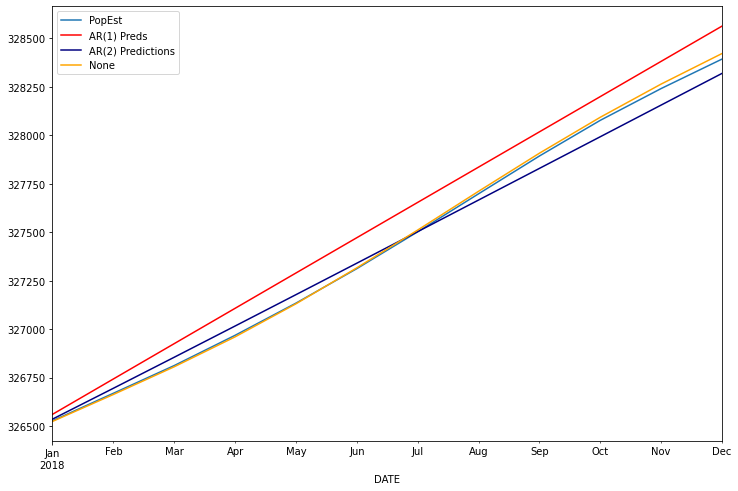

In [64]:
test.plot(figsize=(12,8), legend=True)
prediction1.plot(legend=True, color="red")
predictions2.plot(legend=True, color="navy")
predictions8.plot(legend=True, color="orange")

In [66]:
#Forecast on future data
model =AR(df['PopEst'])
ARfit = model.fit()

In [69]:
forecasted_preds = ARfit.predict(start=len(df), end=len(df)+12).rename('Forecast')
print(forecasted_preds)

2019-01-01    328537.420462
2019-02-01    328673.215488
2019-03-01    328810.443215
2019-04-01    328957.592923
2019-05-01    329117.335891
2019-06-01    329289.277207
2019-07-01    329470.144231
2019-08-01    329655.073588
2019-09-01    329839.482992
2019-10-01    330015.434968
2019-11-01    330175.676006
2019-12-01    330322.580204
2020-01-01    330459.617382
Freq: MS, Name: Forecast, dtype: float64


<AxesSubplot:xlabel='DATE'>

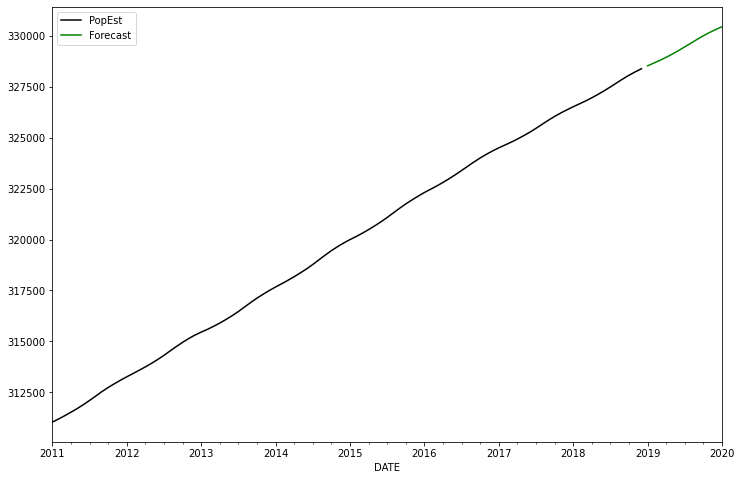

In [72]:
df['PopEst'].plot(figsize=(12,8), legend=True, color='black')
forecasted_preds.plot(legend=True, color='green' )